In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Load the dataset
data = pd.read_csv('understat_per_game.csv')

In [3]:
# Handle outliers in the target variable ('scored') using the IQR method
Q1 = data['scored'].quantile(0.25)  # First quartile (25th percentile)
Q3 = data['scored'].quantile(0.75)  # Third quartile (75th percentile)
IQR = Q3 - Q1  # Interquartile range
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter out the outliers
data = data[(data['scored'] >= lower_bound) & (data['scored'] <= upper_bound)]

print(f"Dataset shape after removing outliers: {data.shape}")

Dataset shape after removing outliers: (24420, 29)


In [4]:
# Step 3: Drop goal_related features and non-useful columns
high_corr_features = ['pts', 'npxG', 'npxGD', 'xG', 'xG_diff', 'wins', 'npxG', 
                      'xpts', 'xGA_diff', 'xGA', 'npxGA', 'xpts_diff', 'loses', 'draws']
data = data.drop(columns=high_corr_features + ['result', 'date', 'team', "year"])

In [5]:
# Apply one-hot encoding to categorical columns ('h_a')
data = pd.get_dummies(data, columns=['h_a', 'league'], drop_first=True)

In [6]:
# Define target and features for predicting 'scored'
X = data.drop(columns=['scored'])  # Features
y = data['scored']  # Target variable (actual goals scored)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [7]:
# Linear Regression Model
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

# Make predictions and evaluate the model
y_pred_linear = linear_model.predict(X_test)
mse_linear = mean_squared_error(y_test, y_pred_linear)
mae_linear = mean_absolute_error(y_test, y_pred_linear)
r2_linear = r2_score(y_test, y_pred_linear)

# Print model performance
print("Linear Regression Model Test Set Performance:")
print(f"Mean Absolute Error (MAE): {mae_linear}")
print(f"Mean Squared Error (MSE): {mse_linear}")
print(f"R-squared (R2): {r2_linear}")

Linear Regression Model Test Set Performance:
Mean Absolute Error (MAE): 0.8989815464436424
Mean Squared Error (MSE): 1.2541994780643997
R-squared (R2): 0.09423240012334078


In [8]:
# Cross-Validation for Linear Regression
cv_mae_scores_linear = cross_val_score(linear_model, X_train, y_train, cv=5, scoring='neg_mean_absolute_error')
cv_mae_scores_linear = -cv_mae_scores_linear  # Convert negative MAE to positive for interpretability
cv_mae_mean_linear = np.mean(cv_mae_scores_linear)
cv_mae_std_linear = np.std(cv_mae_scores_linear)

print("\nLinear Regression Cross-Validation Results:")
print(f"Cross-Validation Mean MAE: {cv_mae_mean_linear}")
print(f"Cross-Validation Standard Deviation of MAE: {cv_mae_std_linear}")
print(f"MAE Scores for Each Fold: {cv_mae_scores_linear}")


Linear Regression Cross-Validation Results:
Cross-Validation Mean MAE: 0.8928048695921158
Cross-Validation Standard Deviation of MAE: 0.012492481627041991
MAE Scores for Each Fold: [0.88935134 0.91113575 0.88715781 0.87481299 0.90156646]


In [9]:
# Training Set Performance
y_train_pred_linear = linear_model.predict(X_train)
train_mae_linear = mean_absolute_error(y_train, y_train_pred_linear)
train_r2_linear = r2_score(y_train, y_train_pred_linear)

print("\nTraining Set Performance:")
print(f"Training Set Mean Absolute Error (MAE): {train_mae_linear}")
print(f"Training Set R-squared (R2): {train_r2_linear}")


Training Set Performance:
Training Set Mean Absolute Error (MAE): 0.8919618247912867
Training Set R-squared (R2): 0.10062913904842141



Top 20 Feature Importance based on Linear Regression Coefficients:
           Feature  Coefficient
13     league_RFPL    -0.276537
9            h_a_h     0.199927
10      league_EPL    -0.135449
12  league_Ligue_1    -0.116630
14  league_Serie_A    -0.090580
11  league_La_liga    -0.082444
0             deep     0.070982
2           missed    -0.068404
3        ppda_coef    -0.008478
5         ppda_def    -0.006844
1     deep_allowed    -0.002928
4         ppda_att     0.001138
7        oppda_att     0.001113
6       oppda_coef    -0.000783
8        oppda_def     0.000598


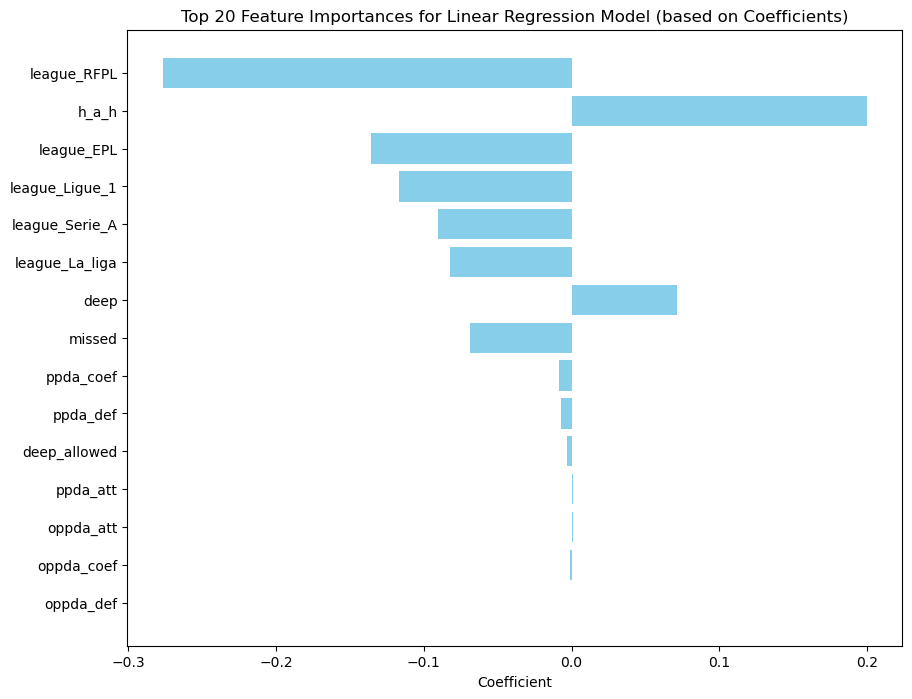

In [10]:
# Feature Importance based on Coefficients
feature_importances = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': linear_model.coef_
}).sort_values(by='Coefficient', key=abs, ascending=False)

# Top 20 Features
top_20_features = feature_importances.head(20)

print("\nTop 20 Feature Importance based on Linear Regression Coefficients:")
print(top_20_features)

# Plotting Feature Importance
plt.figure(figsize=(10, 8))
plt.barh(top_20_features['Feature'], top_20_features['Coefficient'], color='skyblue')
plt.xlabel('Coefficient')
plt.title('Top 20 Feature Importances for Linear Regression Model (based on Coefficients)')
plt.gca().invert_yaxis()
plt.show()
